# TUGAS DATA MINING B

# FRANSISKA Y 06211640000007

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_excel('DATA LATIHAN 5 MARET.xlsx',sheet_name='NRP_7')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,55,Private,199067,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,29,Private,247445,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
2,49,Private,186078,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
3,31,Private,77634,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,42,United-States,<=50K
4,24,Private,180060,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,6849,0,90,United-States,<=50K


In [11]:
data.shape

(300, 15)

In [12]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,39.160000,193758.120000,10.216667,747.000000,71.700000,41.493333
std,13.761261,103644.895592,2.601078,6085.593345,355.689161,12.704644
min,17.000000,22546.000000,2.000000,0.000000,0.000000,5.000000
25%,28.000000,123611.000000,9.000000,0.000000,0.000000,40.000000
50%,38.500000,183318.500000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,243360.250000,13.000000,0.000000,0.000000,45.000000
max,90.000000,746786.000000,15.000000,99999.000000,2415.000000,99.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 24.6+ KB


## Missing Value

In [14]:
data = data.replace(' ?', np.nan)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    296 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 24.6+ KB


## Memisahkan kolom2

In [17]:
Y = ['type']
X_int = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']

In [18]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

## Mengganti missing value

In [19]:
## find missing data for each data type and fill it with mean and mode
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [54]:
data_cat_clean = pd.concat(data_cat_array)

In [55]:
data_clean= pd.concat([data_int,data_cat_clean,data_Y], axis=1)
data_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,55.0,199067.0,9.0,0.0,0.0,40.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K
1,29.0,247445.0,9.0,0.0,0.0,45.0,Private,HS-grad,Divorced,Sales,Not-in-family,White,Male,United-States,<=50K
2,49.0,186078.0,14.0,0.0,0.0,50.0,Private,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,>50K
3,31.0,77634.0,11.0,0.0,0.0,42.0,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,White,Male,United-States,<=50K
4,24.0,180060.0,14.0,6849.0,0.0,90.0,Private,Masters,Never-married,Exec-managerial,Own-child,White,Male,United-States,<=50K


## Standardize

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
data_clean['age'] = StandardScaler().fit(data_clean[['age']]).transform(data_clean[['age']])
data_clean['fnlwgt'] = StandardScaler().fit(data_clean[['fnlwgt']]).transform(data_clean[['fnlwgt']])
data_clean['education-num'] = StandardScaler().fit(data_clean[['education-num']]).transform(data_clean[['education-num']])
data_clean['capital-gain'] = StandardScaler().fit(data_clean[['capital-gain']]).transform(data_clean[['capital-gain']])
data_clean['capital-loss'] = StandardScaler().fit(data_clean[['capital-loss']]).transform(data_clean[['capital-loss']])
data_clean['hours-per-week'] = StandardScaler().fit(data_clean[['hours-per-week']]).transform(data_clean[['hours-per-week']])
data_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,type
0,1.152981,0.051307,-0.468536,-0.122954,-0.201917,-0.117739,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K
1,-0.739538,0.518854,-0.468536,-0.122954,-0.201917,0.276476,Private,HS-grad,Divorced,Sales,Not-in-family,White,Male,United-States,<=50K
2,0.716245,-0.074224,1.456955,-0.122954,-0.201917,0.670690,Private,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,>50K
3,-0.593960,-1.122276,0.301660,-0.122954,-0.201917,0.039947,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,White,Male,United-States,<=50K
4,-1.103484,-0.132385,1.456955,1.004371,-0.201917,3.824406,Private,Masters,Never-married,Exec-managerial,Own-child,White,Male,United-States,<=50K


## Deteksi outlier

In [59]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

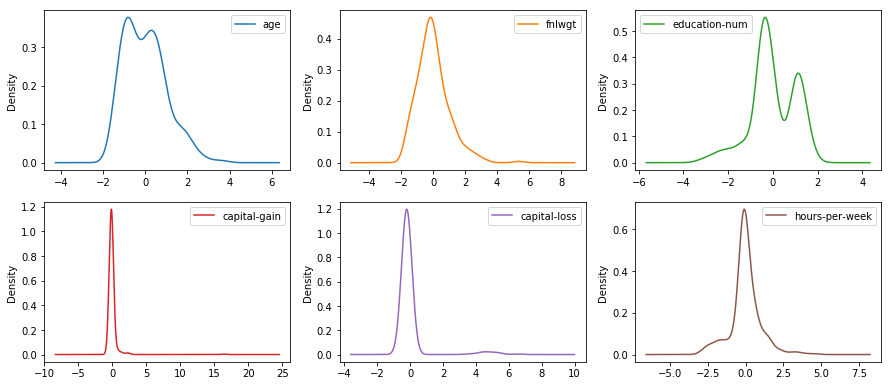

In [60]:
# Univariate Density Plots
data_clean.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

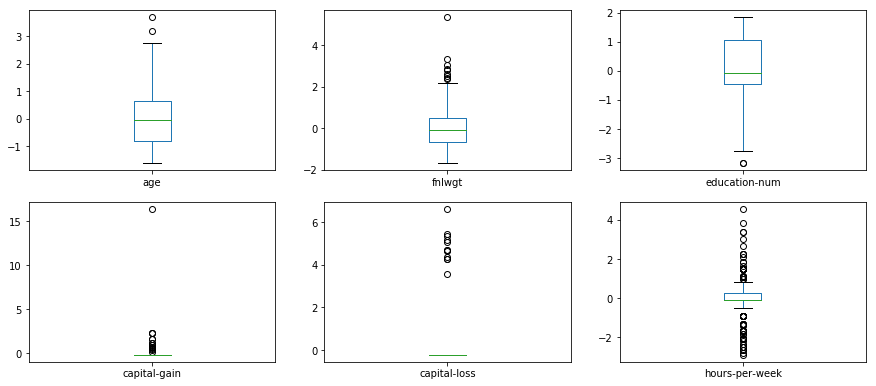

In [61]:
data_clean.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [72]:
colors_palette = {" <=50K": "red",  " >50K": "green"}
colors = [colors_palette[c] for c in data_clean['type']] 

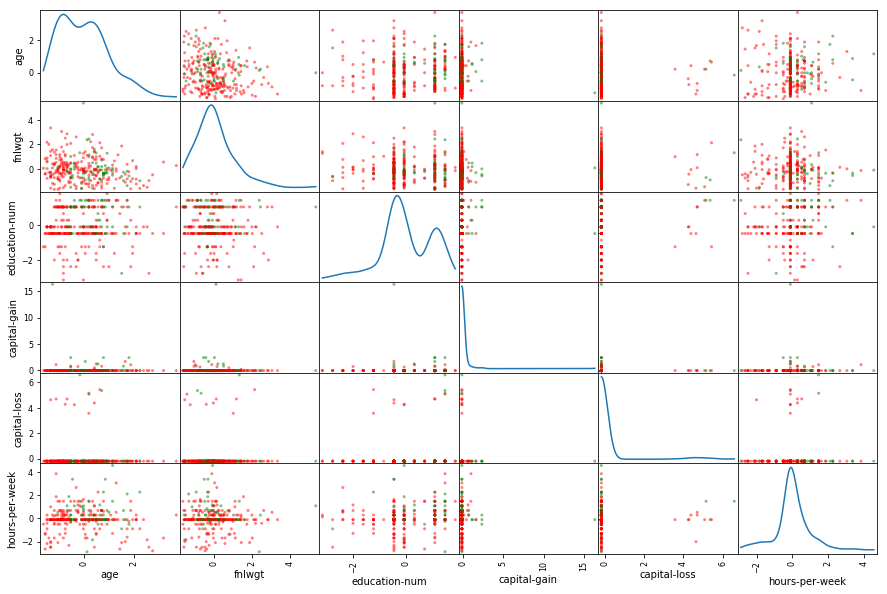

In [73]:
## red : <=50K
## green:  >50K
from pandas.plotting import scatter_matrix
scatter_matrix(data_clean, color=colors, diagonal='kde')
plt.show()

In [74]:
data_clean.to_csv('data_cleaned.csv', index=0)